<a href="https://colab.research.google.com/github/Basu8971/Materraproject/blob/main/heat_units_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data from the Google Sheet:
                       FarmerName  CumulativeHU  Yield
0       Vishnubhai Atmaram Thakor   2273.283075  792.0
1  Dineshbhai Gandabhai Chaudhari   1804.390421  120.0
2      Mayursinh Dilipsinh Vagela   1998.626334  640.0
3    Kalpeshbhai Keshavlala Patel   2112.844713  640.0
4   Mahendrabhai Keshavlala Patel   2124.538804  672.0


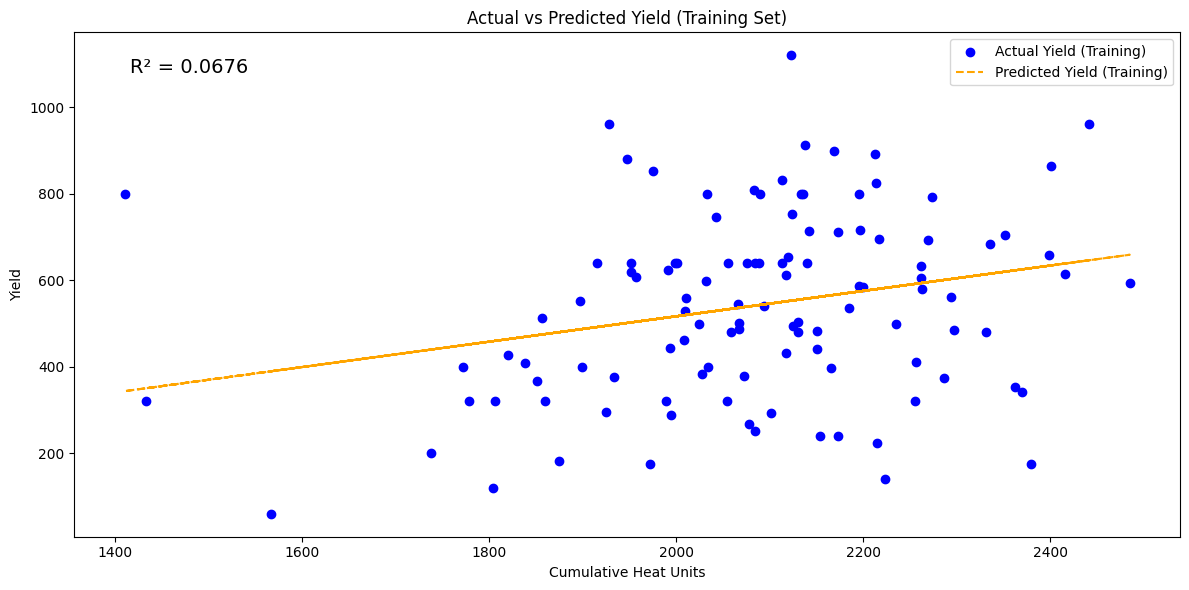

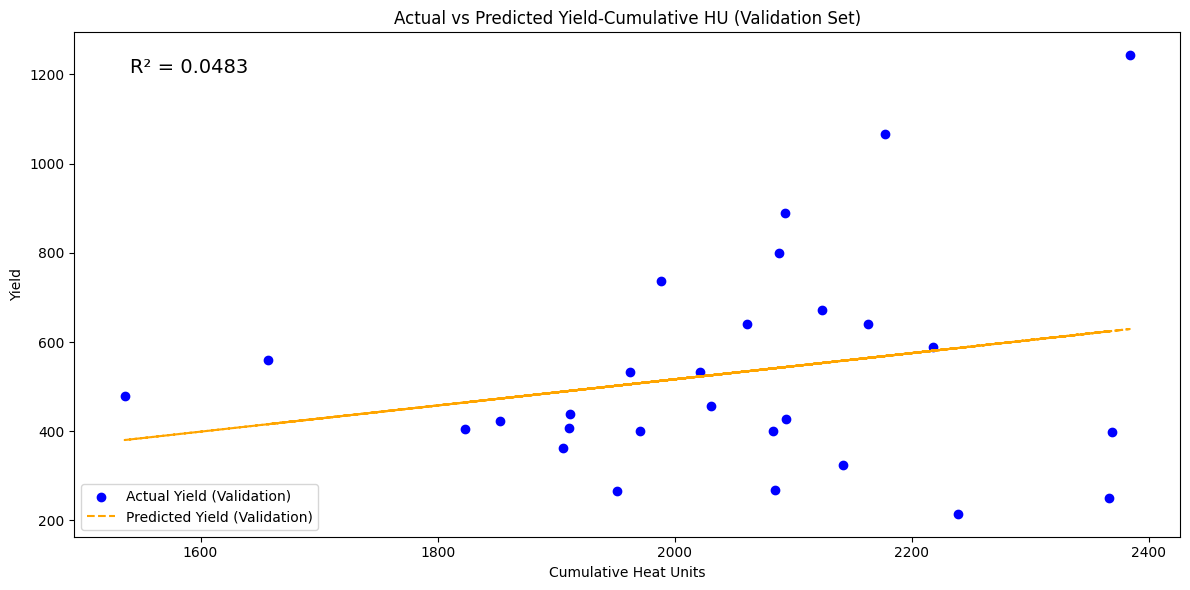

Mean Squared Error (Validation): 54253.206464162155
R-squared (Validation): 0.048346159132813704


TypeError: can't multiply sequence by non-int of type 'float'

In [71]:
# Step 1: Install necessary libraries
!pip install --upgrade gspread google-auth

# Step 2: Authenticate with Google using google-auth
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Authenticate the Google account
auth.authenticate_user()

# Use google-auth to get credentials and authorize gspread
creds, _ = default()
gc = gspread.authorize(creds)

# Step 3: Access Google Sheets using the provided URL
sheet_url = 'https://docs.google.com/spreadsheets/d/178pxG7k78BFjucPKfCEWA0ulBZ45vJuyMRLG-MA7KFw/edit?gid=375581760'

# Open the Google Sheets using gspread
sheet = gc.open_by_url(sheet_url)

# Load the data from the sheet into a pandas DataFrame
data = pd.DataFrame(sheet.sheet1.get_all_records())

# Display the first few rows of the data to ensure it's loaded correctly
print("Data from the Google Sheet:")
print(data.head())

# Step 4: Data Preprocessing
# Drop rows with missing CumulativeHU or Yield values
data = data.dropna(subset=['CumulativeHU', 'Yield'])

# Step 5: Prepare the features (independent variable) and target (dependent variable)
X = data[['CumulativeHU']]  # Independent variable (Cumulative Heat Units)
y = data['Yield']  # Dependent variable (Yield)

# Step 6: Split the data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Add a constant to the independent variable (for the intercept in OLS)
X_train = sm.add_constant(X_train)  # Adds an intercept (constant) to the model
X_val = sm.add_constant(X_val)

# Step 8: Fit the OLS regression model
ols_model = sm.OLS(y_train, X_train).fit()

# Step 9: Predict yield for the training data
y_train_pred = ols_model.predict(X_train)

# Step 10: Predict yield for the validation data
y_val_pred = ols_model.predict(X_val)

# Step 11: Plot Actual vs Predicted Yield for the training data
plt.figure(figsize=(12, 6))

# Plot actual values for training (blue)
plt.scatter(X_train['CumulativeHU'], y_train, color='blue', label='Actual Yield (Training)', marker='o')

# Plot predicted values for training (orange)
plt.plot(X_train['CumulativeHU'], y_train_pred, color='orange', label='Predicted Yield (Training)', linestyle='--')

# Title and labels
plt.xlabel('Cumulative Heat Units')
plt.ylabel('Yield')
plt.title('Actual vs Predicted Yield (Training Set)')

# Calculate R-squared for the training data
r2_train = r2_score(y_train, y_train_pred)

# Display the R-squared value on the graph for training data
plt.text(0.05, 0.95, f'R² = {r2_train:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

# Add legend
plt.legend()

# Display the plot for training data
plt.tight_layout()
plt.show()

# Step 12: Plot Actual vs Predicted Yield for the validation data
plt.figure(figsize=(12, 6))

# Plot actual values for validation (blue)
plt.scatter(X_val['CumulativeHU'], y_val, color='blue', label='Actual Yield (Validation)', marker='o')

# Plot predicted values for validation (orange)
plt.plot(X_val['CumulativeHU'], y_val_pred, color='orange', label='Predicted Yield (Validation)', linestyle='--')

# Title and labels
plt.xlabel('Cumulative Heat Units')
plt.ylabel('Yield')
plt.title('Actual vs Predicted Yield-Cumulative HU (Validation Set)')

# Calculate R-squared for the validation data
r2_val = r2_score(y_val, y_val_pred)

# Display the R-squared value on the graph for validation data
plt.text(0.05, 0.95, f'R² = {r2_val:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

# Add legend
plt.legend()

# Display the plot for validation data
plt.tight_layout()
plt.show()

# Step 13: Evaluate the model on validation data
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error (Validation): {mse_val}')
print(f'R-squared (Validation): {r2_val}')

# Step 14: Using the trained model to predict Yield for a new CumulativeHU value
def predict_yield(cumulative_hu_value):
    # Ensure that the input is a DataFrame with the constant (intercept) added
    cumulative_hu_df = pd.DataFrame([cumulative_hu_value], columns=['CumulativeHU'])
    cumulative_hu_df = sm.add_constant(cumulative_hu_df)  # Add constant (intercept)

    # Predict the yield
    predicted_yield = ols_model.predict(cumulative_hu_df)
    return predicted_yield[0]

# Example: Predict yield for a new Cumulative HU value
new_cumulative_hu = '2500'  # You can change this value to test with different inputs
predicted_yield = predict_yield(new_cumulative_hu)
print(f"Predicted yield for Cumulative HU {new_cumulative_hu}: {predicted_yield}")


Index(['FarmerName', 'Date', 'Quarter', 'Quarter value', 'Quartersumvalue',
       'Yield'],
      dtype='object')
                       FarmerName        Date Quarter Quarter value  \
0       Vishnubhai Atmaram Thakor  2023-07-13       1   663.4625841   
1       Vishnubhai Atmaram Thakor  2023-08-26       2   555.5640022   
2       Vishnubhai Atmaram Thakor  2023-10-09       3   555.3888049   
3       Vishnubhai Atmaram Thakor  2023-11-25       4   498.8676838   
4  Dineshbhai Gandabhai Chaudhari  2023-07-08       1    513.434316   

  Quartersumvalue Yield  
0     663.4625841   792  
1     1219.026586   792  
2     1774.415391   792  
3     2273.283075   792  
4      513.434316   120  
All required columns are present!


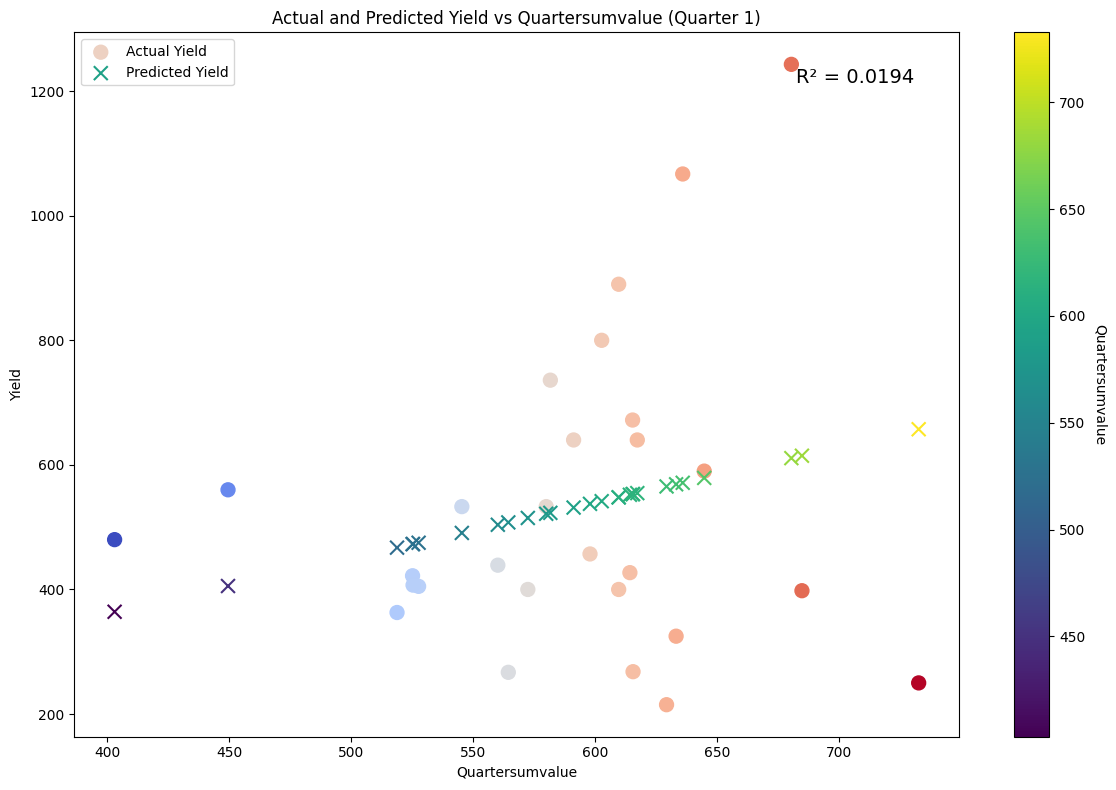

R-squared (Validation, Quarter 1): 0.019395736235070404


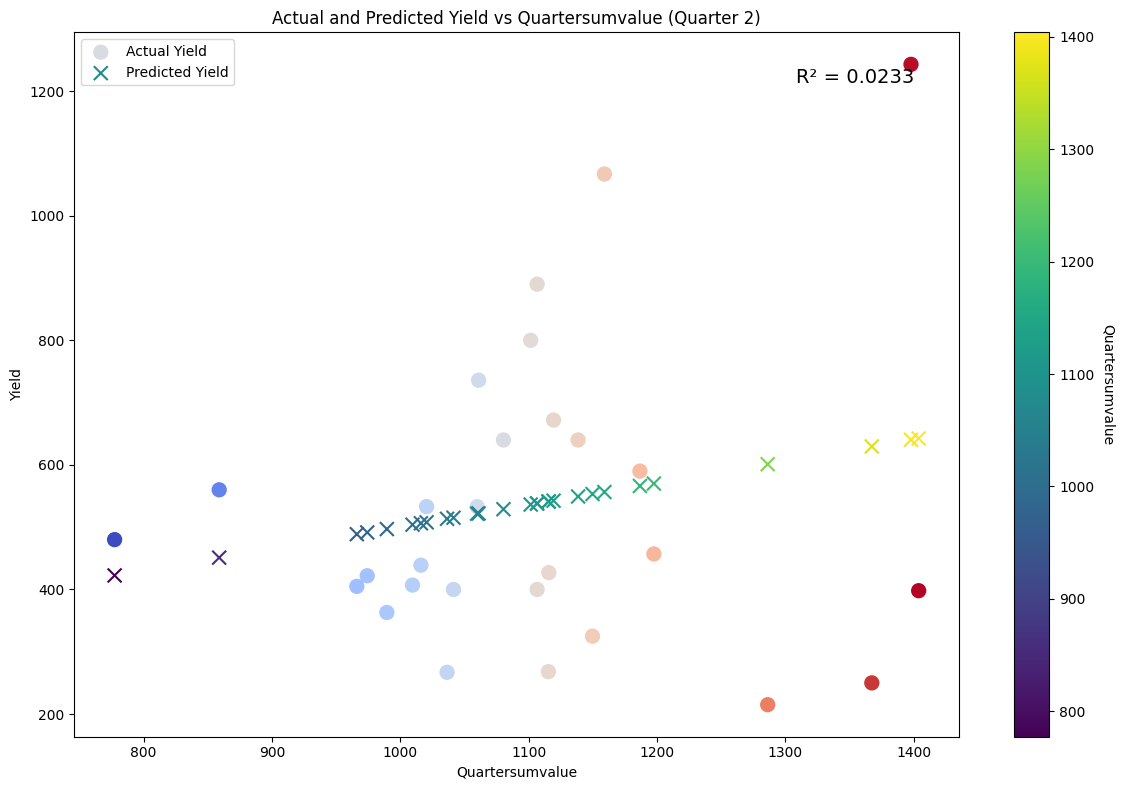

R-squared (Validation, Quarter 2): 0.023285813856719795


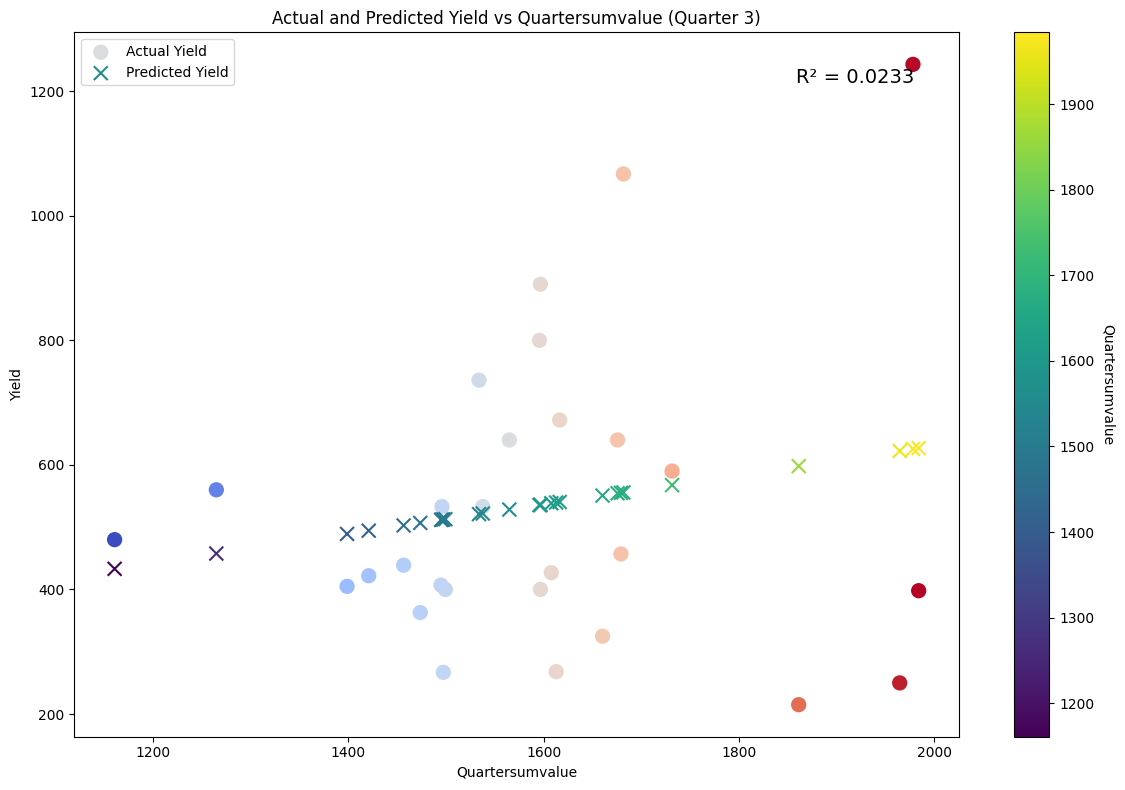

R-squared (Validation, Quarter 3): 0.02329195939224904


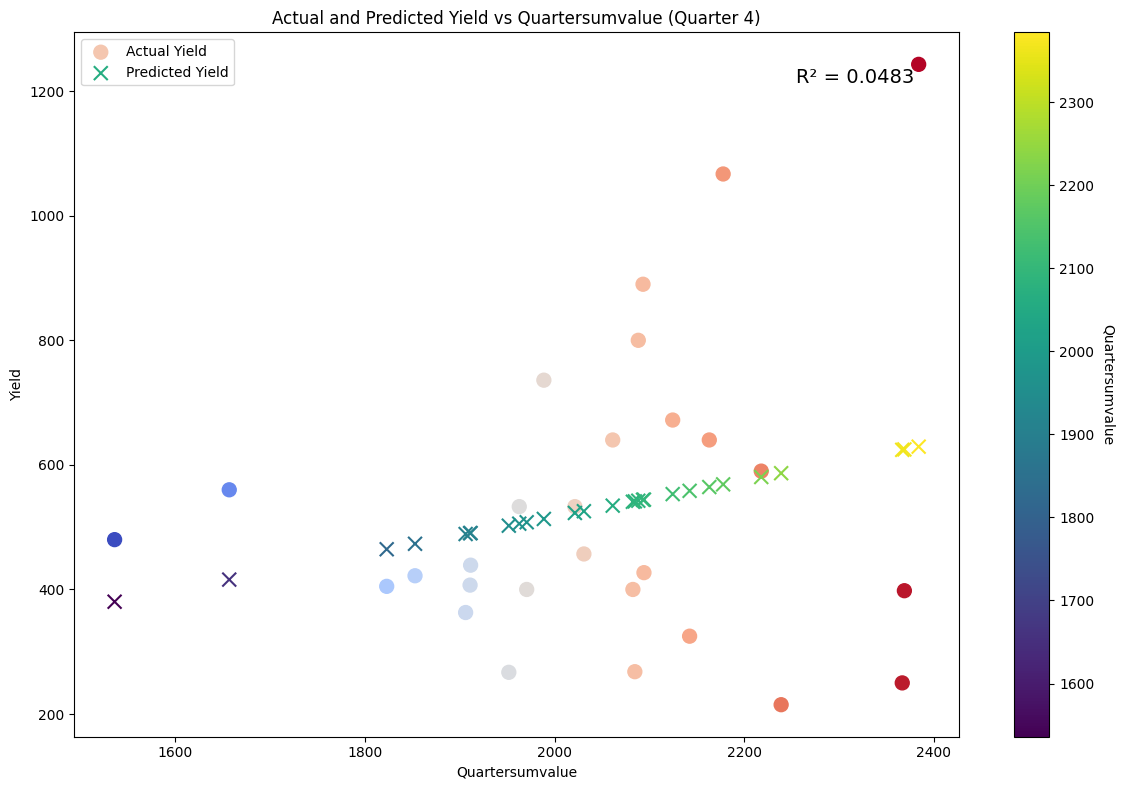

R-squared (Validation, Quarter 4): 0.0483461591360872


In [121]:
# Install necessary libraries (if not already installed)
!pip install --upgrade gspread google-auth statsmodels scikit-learn matplotlib

# Authenticate and access Google Sheets
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Authenticate and authorize access to Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Access the heat unit data from Google Sheets
quarter_data_url = 'https://docs.google.com/spreadsheets/d/178pxG7k78BFjucPKfCEWA0ulBZ45vJuyMRLG-MA7KFw/edit?gid=1044324820#gid=1044324820'

# Open the sheet using gspread
quarter_data_sheet = gc.open_by_url(quarter_data_url)

# Fetch all data from the sheet
quarter_data_raw = quarter_data_sheet.sheet1.get_all_values()

# Convert the data to a pandas DataFrame
quarter_data_df = pd.DataFrame(quarter_data_raw[1:], columns=quarter_data_raw[0])

# Step 1: Inspect the column names and data types to avoid any KeyError
print(quarter_data_df.columns)  # Print column names
print(quarter_data_df.head())   # Check the first few rows of the data

# Step 2: Clean the data (convert columns to appropriate types)
quarter_data_df['Quarter'] = pd.to_numeric(quarter_data_df['Quarter'], errors='coerce')
quarter_data_df['Quartersumvalue'] = pd.to_numeric(quarter_data_df['Quartersumvalue'], errors='coerce')
quarter_data_df['Yield'] = pd.to_numeric(quarter_data_df['Yield'], errors='coerce')

# Step 3: Check if all necessary columns exist for OLS modeling
# Let's make sure the columns we're using in the model are correctly named
required_columns = ['FarmerName', 'Quarter', 'Quartersumvalue', 'Yield']
missing_columns = [col for col in required_columns if col not in quarter_data_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present!")

# Step 4: Train OLS models and validate for each quarter (1 to 4)
quarters = [1, 2, 3, 4]
for quarter in quarters:
    # Filter data for the current quarter
    quarter_data = quarter_data_df[quarter_data_df['Quarter'] == quarter]

    # Features (independent variable) and target (dependent variable)
    X = quarter_data[['Quartersumvalue']]  # Cumulative heat units (or Quartersumvalue) as feature
    y = quarter_data['Yield']  # Yield as target

    # Step 5: Split the data into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add a constant to the independent variable for the intercept in OLS
    X_train = sm.add_constant(X_train)  # Adds an intercept (constant) to the model
    X_val = sm.add_constant(X_val)

    # Step 6: Fit the OLS regression model
    ols_model = sm.OLS(y_train, X_train).fit()

    # Step 7: Predict yield for the validation data
    y_val_pred = ols_model.predict(X_val)

    # Step 8: Calculate R-squared for the validation data
    r2_val = r2_score(y_val, y_val_pred)

    # Step 9: Plot Predicted Yield vs Actual Yield for the validation data (one dot per farmer)
    plt.figure(figsize=(12, 8))

    # Plot actual values for validation (blue) - one dot per farmer
    scatter_actual = plt.scatter(X_val['Quartersumvalue'], y_val, c=X_val['Quartersumvalue'], cmap='coolwarm', s=100, label='Actual Yield', marker='o')

    # Plot predicted values for validation (red) - one dot per farmer
    scatter_pred = plt.scatter(X_val['Quartersumvalue'], y_val_pred, c=X_val['Quartersumvalue'], cmap='viridis', s=100, label='Predicted Yield', marker='x')

    # Add labels, title, and color bar
    plt.xlabel('Quartersumvalue')
    plt.ylabel('Yield')
    plt.title(f'Actual and Predicted Yield vs Quartersumvalue (Quarter {quarter})')

    # Display the R-squared value on the graph for validation data in the top-right corner
    plt.text(0.95, 0.95, f'R² = {r2_val:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', horizontalalignment='right')

    # Add color bar
    cbar = plt.colorbar(scatter_pred)
    cbar.set_label('Quartersumvalue', rotation=270, labelpad=15)

    # Add legend
    plt.legend(loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print the R-squared value for validation data
    print(f'R-squared (Validation, Quarter {quarter}): {r2_val}')
